In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import svm, metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model

In [3]:
import math

In [4]:
dna_meth = pd.read_csv("G5/G5/G5_lung_dna-meth.csv", header=0, index_col=0) 
gen_exp = pd.read_csv("G5/G5/G5_lung_gene-expr.csv", header=0, index_col=0)

In [5]:
dna_meth.isnull().values.any()

False

In [6]:
dna_meth['Label'].value_counts()

Primary Tumor          370
Solid Tissue Normal     42
Name: Label, dtype: int64

In [7]:
gen_exp.isnull().values.any()

False

In [258]:
gen_exp['Label'].value_counts()

Primary Tumor          501
Solid Tissue Normal     51
Name: Label, dtype: int64

# DNA METH

Label  cg00001747  cg00002719  cg00002749  \
TCGA.60.2704.01        Primary Tumor    0.338867    0.030981    0.908153   
TCGA.77.A5G8.01        Primary Tumor    0.665883    0.683279    0.568018   
TCGA.77.A5G7.01        Primary Tumor    0.682840    0.347391    0.711799   
TCGA.77.A5G6.01        Primary Tumor    0.048786    0.382621    0.407781   
TCGA.77.A5G3.01        Primary Tumor    0.455438    0.571720    0.678262   
...                              ...         ...         ...         ...   
TCGA.22.5485.11  Solid Tissue Normal    0.062304    0.017904    0.928152   
TCGA.22.5482.11  Solid Tissue Normal    0.033638    0.019814    0.935682   
TCGA.22.5480.11  Solid Tissue Normal    0.062513    0.023960    0.937941   
TCGA.39.5016.11  Solid Tissue Normal    0.017064    0.017089    0.948357   
TCGA.18.3417.11  Solid Tissue Normal    0.015847    0.018211    0.947105   

                 cg00003298  cg00009292  cg00011616  cg00012529  cg00018128  \
TCGA.60.2704.01    0.389420    0.325159    0.674786    0.517374    0.353541   
TCGA.77.A5G8.01    0.589483    0.606269    0.867197    0.495574    0.662254   
TCGA.77.A5G7.01    0.642214    0.556409    0.571301    0.594196    0.364856   
TCGA.77.A5G6.01    0.062077    0.763170    0.779759    0.467798    0.836563   
TCGA.77.A5G3.01    0.827484    0.732743    0.730348    0.441653    0.772935   
...                     ...         ...         ...         ...         ...   
TCGA.22.5485.11    0.064406    0.114016    0.439573    0.971406    0.064923   
TCGA.22.5482.11    0.019768    0.068814    0.386430    0.973849    0.093655   
TCGA.22.5480.11    0.022368    0.078683    0.497554    0.979290    0.091345   
TCGA.39.5016.11    0.014968    0.065933    0.550442    0.978715    0.048311   
TCGA.18.3417.11    0.012583    0.062456    0.516875    0.977849    0.064575   

                 cg00025439  ...  rs7746156  rs798149  rs845016  rs877309  \
TCGA.60.2704.01    0.580952  ...   0.489248  0.015020  0.333350  0.015578   
TCGA.77.A5G8.01    0.933564  ...   0.318761  0.016892  0.247355  0.329498   
TCGA.77.A5G7.01    0.449169  ...   0.464207  0.014398  0.034117  0.972381   
TCGA.77.A5G6.01    0.118820  ...   0.971122  0.973628  0.043686  0.646525   
TCGA.77.A5G3.01    0.904740  ...   0.203935  0.967670  0.642454  0.517907   
...                     ...  ...        ...       ...       ...       ...   
TCGA.22.5485.11    0.758893  ...   0.471108  0.396886  0.430758  0.533244   
TCGA.22.5482.11    0.559338  ...   0.022224  0.014523  0.468619  0.540866   
TCGA.22.5480.11    0.728559  ...   0.475629  0.971984  0.457597  0.524817   
TCGA.39.5016.11    0.845831  ...   0.020987  0.013944  0.948985  0.501315   
TCGA.18.3417.11    0.384277  ...   0.470568  0.014775  0.431012  0.522130   

                 rs9292570  rs9363764  rs939290  rs951295  rs966367  rs9839873  
TCGA.60.2704.01   0.512522   0.577918  0.636679  0.520590  0.954198   0.945939  
TCGA.77.A5G8.01   0.964931   0.335113  0.762442  0.968126  0.375235   0.934013  
TCGA.77.A5G7.01   0.974564   0.556752  0.967441  0.036962  0.025259   0.416684  
TCGA.77.A5G6.01   0.016822   0.706732  0.891146  0.557666  0.545931   0.925790  
TCGA.77.A5G3.01   0.441311   0.949061  0.968422  0.452258  0.543547   0.926262  
...                    ...        ...       ...       ...       ...        ...  
TCGA.22.5485.11   0.506895   0.956300  0.531514  0.524228  0.036443   0.631534  
TCGA.22.5482.11   0.966205   0.962164  0.019620  0.547039  0.475079   0.957735  
TCGA.22.5480.11   0.025429   0.037531  0.518352  0.513805  0.929747   0.619294  
TCGA.39.5016.11   0.522502   0.967071  0.510640  0.025683  0.955482   0.957345  
TCGA.18.3417.11   0.963386   0.553822  0.025123  0.537591  0.029795   0.961893  

[412 rows x 5001 columns]

C:\Users\linhn\anaconda3\envs\binf7000\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


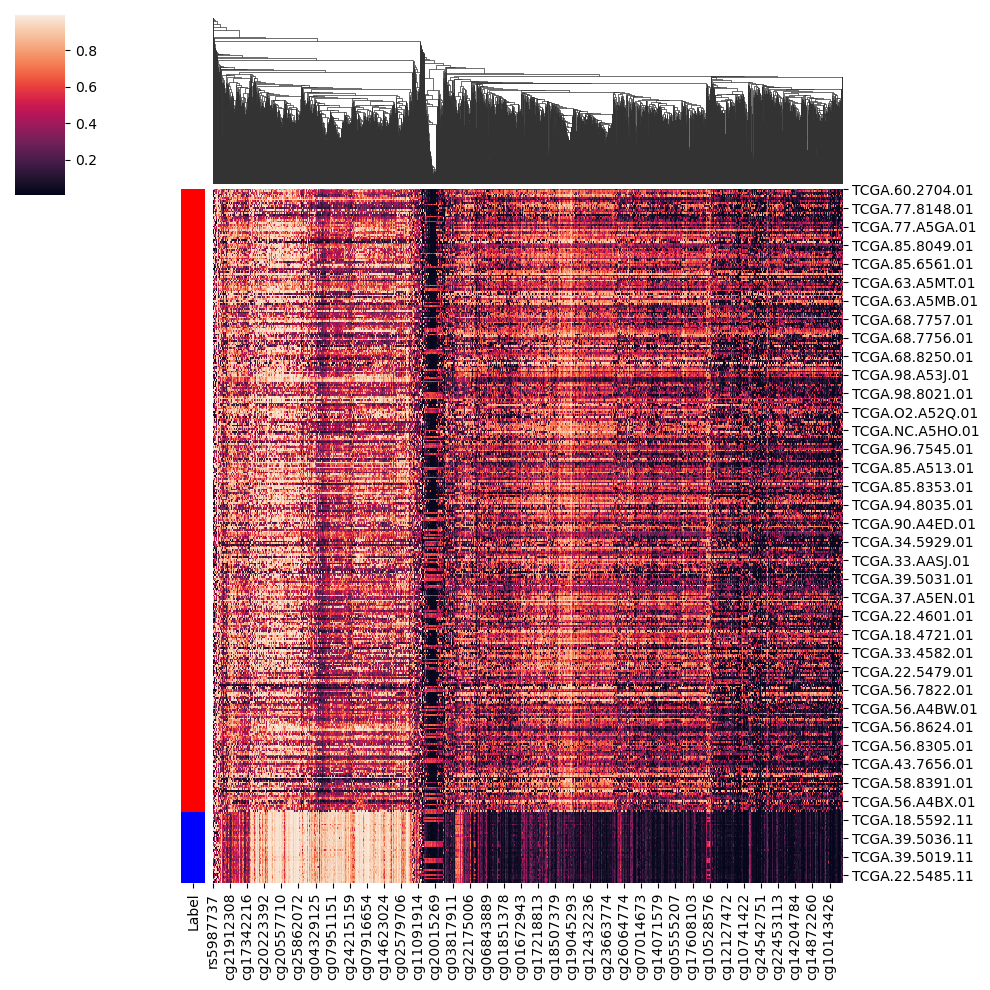

In [4]:
dna_meth = pd.read_csv("G5/G5/G5_lung_dna-meth.csv", header=0, index_col=0) 
sort_dna_m = pd.DataFrame(dna_meth.sort_values(by='Label'))
display(sort_dna_m)


#visualize data
cancer_type = sort_dna_m.pop("Label")
cancer_note = dict(zip(cancer_type.unique(), "rbg"))
row_colors = cancer_type.map(cancer_note)
g = sns.clustermap(sort_dna_m, row_colors=row_colors, row_cluster=False)

## Checking mean scaling between markers

C:\Users\linhn\AppData\Local\Temp\ipykernel_2884\347014871.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dna_meth_sum.T['mean'], shade=True)


<AxesSubplot:xlabel='mean', ylabel='Density'>

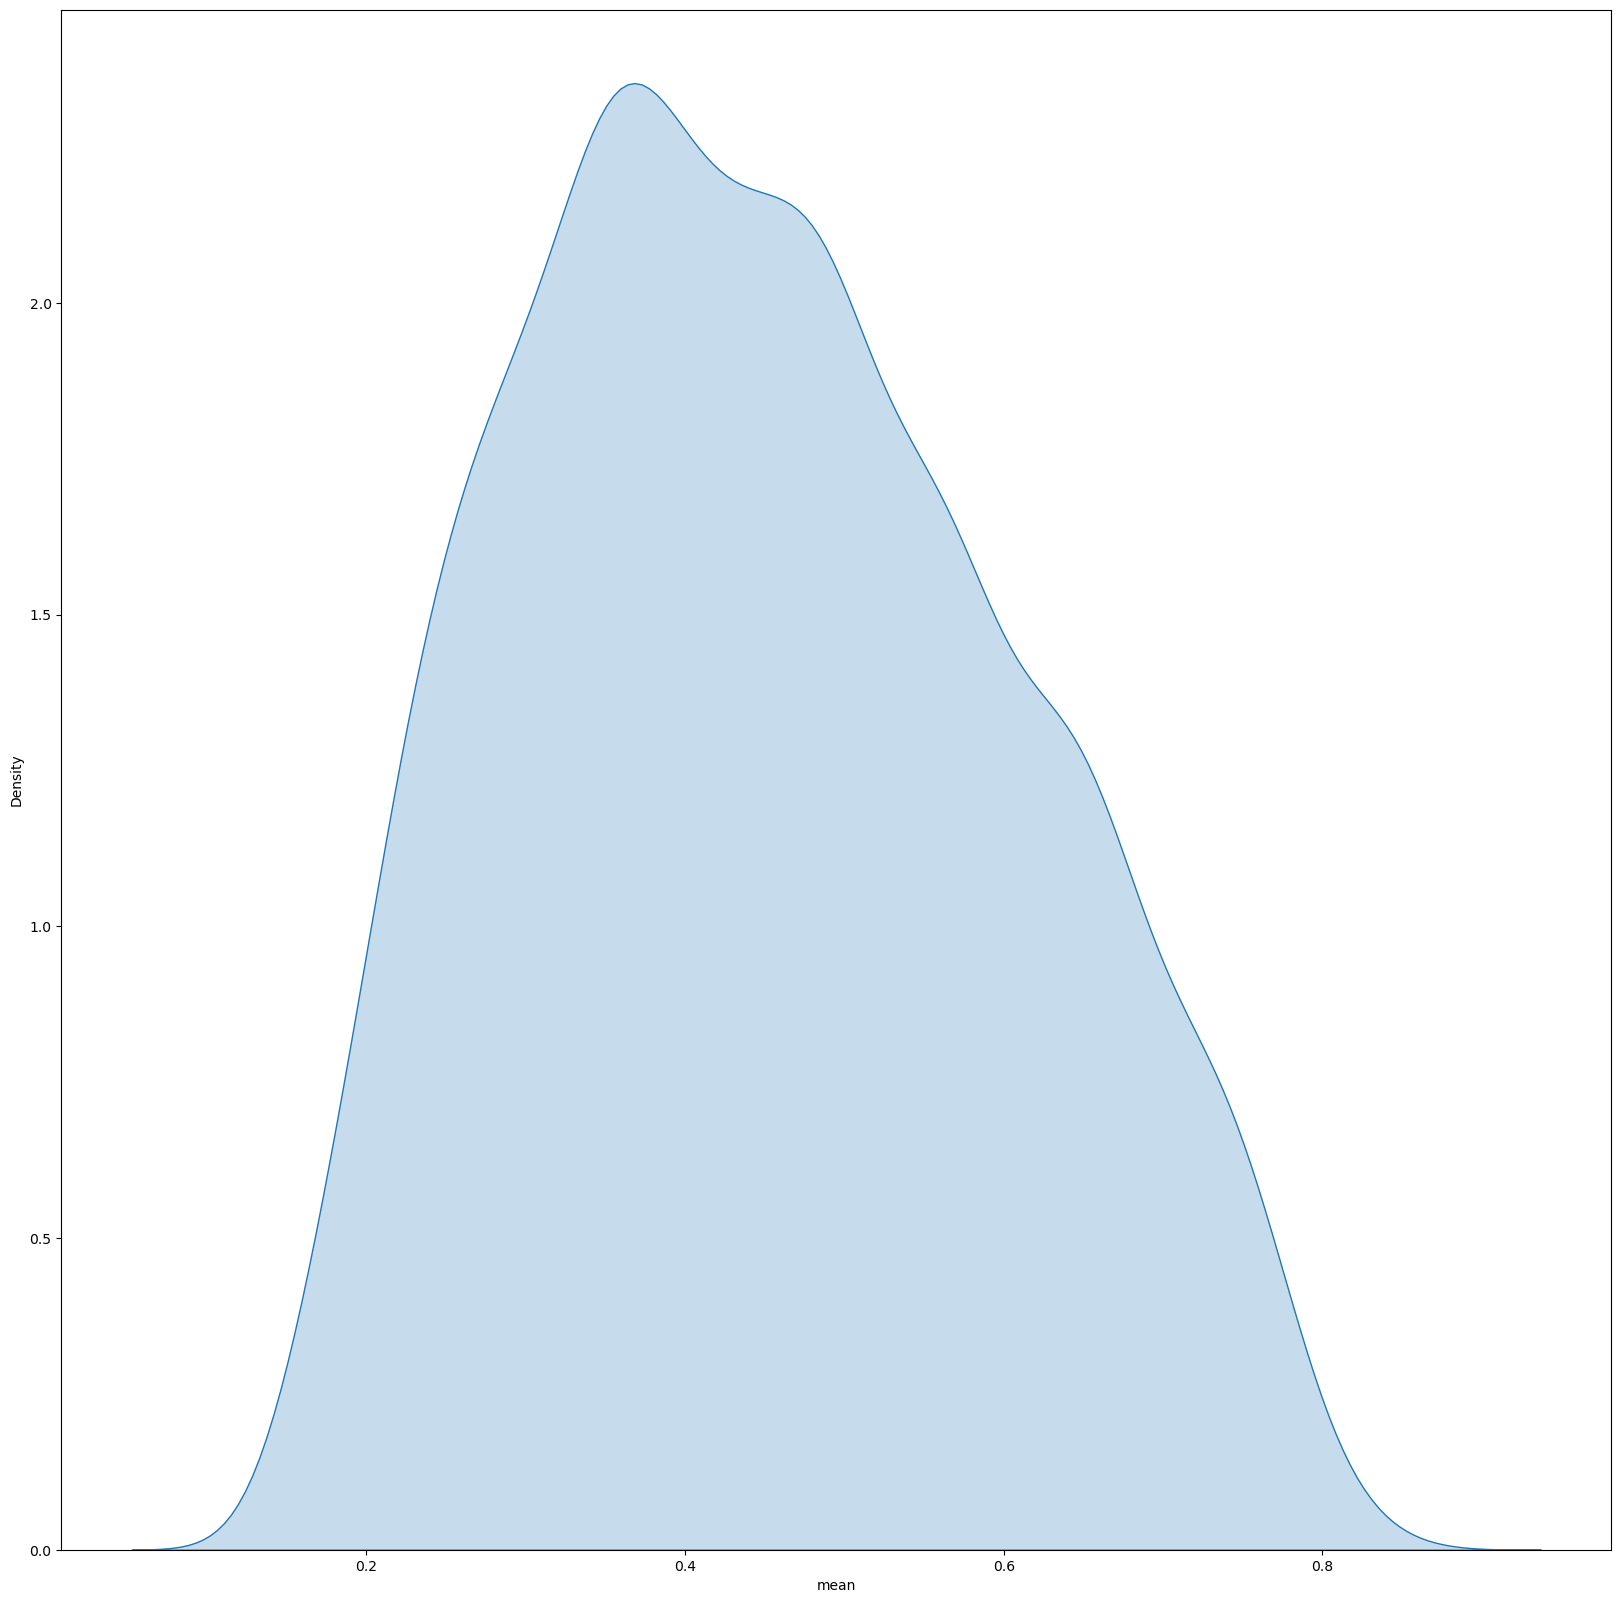

In [234]:
dna_meth_sum = dna_meth.describe()

dna_meth_sum

sns.kdeplot(dna_meth_sum.T['mean'], shade=True)

### => Seem that the entire data set is scaled with the same value -> no need normalization across samples to compared


In [9]:
dna_meth = pd.read_csv("G5/G5/G5_lung_dna-meth.csv", index_col=0, header=0) 
dna_meth.describe()

cg00001747  cg00002719  cg00002749  cg00003298  cg00009292  cg00011616  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean     0.328096    0.351194    0.643028    0.348508    0.329188    0.593510   
std      0.259036    0.267046    0.253800    0.277570    0.234548    0.250789   
min      0.013207    0.013696    0.068865    0.012339    0.035924    0.038014   
25%      0.066930    0.055193    0.420175    0.037987    0.095030    0.390244   
50%      0.273690    0.354055    0.682651    0.374531    0.307943    0.567263   
75%      0.556710    0.559819    0.877858    0.596169    0.517866    0.813533   
max      0.940554    0.952406    0.961048    0.909282    0.918626    0.983753   

       cg00012529  cg00018128  cg00025439  cg00028211  ...   rs7746156  \
count  412.000000  412.000000  412.000000  412.000000  ...  412.000000   
mean     0.641690    0.425544    0.652032    0.553526  ...    0.544927   
std      0.245934    0.240817    0.237667    0.265847  ...    0.344766   
min      0.057771    0.031732    0.048579    0.030312  ...    0.014664   
25%      0.431634    0.224903    0.479600    0.350432  ...    0.362905   
50%      0.602864    0.433536    0.700990    0.574788  ...    0.490594   
75%      0.913823    0.614297    0.864953    0.785896  ...    0.958811   
max      0.980249    0.915908    0.970758    0.962593  ...    0.979066   

         rs798149    rs845016    rs877309   rs9292570   rs9363764    rs939290  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean     0.469609    0.448914    0.510367    0.574724    0.598762    0.560976   
std      0.449182    0.326620    0.355330    0.339743    0.342244    0.351166   
min      0.010428    0.025890    0.010536    0.016307    0.021277    0.016597   
25%      0.015362    0.090801    0.029627    0.419100    0.442277    0.280050   
50%      0.372863    0.446515    0.521346    0.534200    0.573950    0.599816   
75%      0.969771    0.753062    0.956841    0.958269    0.946749    0.948361   
max      0.984025    0.960733    0.981575    0.982827    0.974497    0.980555   

         rs951295    rs966367   rs9839873  
count  412.000000  412.000000  412.000000  
mean     0.470832    0.442588    0.777987  
std      0.307243    0.326465    0.264064  
min      0.022143    0.022650    0.023117  
25%      0.074486    0.043279    0.679712  
50%      0.518755    0.475126    0.919122  
75%      0.578440    0.624517    0.945964  
max      0.979929    0.969946    0.972597  

[8 rows x 5000 columns]

### Checking normal distribution

In [10]:
#normal distribution 
import scipy
from scipy import stats
column_list = [x for x in dna_meth.columns if x != 'Label']
# create an empty dictionary
normal_dis_meth = {}
# loop over column_list and execute code for normal distribution testing
for column in column_list:
    # add the output to the dictionary
    normal_dis_meth[column] = scipy.stats.shapiro(dna_meth[column])

# create dataframe for normal distribute result "statistic" "pvalue"
results_ndis_meth = pd.DataFrame.from_dict(normal_dis_meth,orient='Index')
results_ndis_meth.columns = ['statistic','pvalue']

In [11]:
results_ndis_meth.loc[results_ndis_meth['pvalue'] > 0.05]

Empty DataFrame
Columns: [statistic, pvalue]
Index: []

### Since not all distribution is not normal in very marker and different between sampling size -> use mann whitney tes

In [12]:
import pandas as pd

import scipy.stats as stats

column_list = [x for x in dna_meth.columns if x != 'Label']
# create an empty dictionary
test_results = {}
# loop over column_list and execute test
for column in column_list:
    #subset cancer dataframe and normal tissue dataframe
    cancer = dna_meth.where(dna_meth.Label == 'Primary Tumor').dropna()[column]
    normal= dna_meth.where(dna_meth.Label == 'Solid Tissue Normal').dropna()[column]
    # add the output to the dictionary 
    test_results[column] = scipy.stats.mannwhitneyu(cancer, normal)
    
results_df = pd.DataFrame.from_dict(test_results,orient='Index')
results_df.columns = ['statistic','pvalue']

In [13]:
results_df

statistic        pvalue
cg00001747    14331.0  2.945974e-19
cg00002719    15066.0  1.946437e-23
cg00002749      705.0  4.463710e-22
cg00003298    14844.0  3.958477e-22
cg00009292    14084.0  5.977867e-18
...               ...           ...
rs9363764      7983.0  7.713811e-01
rs939290       8083.0  6.691557e-01
rs951295       7359.0  5.745858e-01
rs966367       7934.0  8.230942e-01
rs9839873      7696.0  9.199453e-01

[5000 rows x 2 columns]

In [14]:
# get CG marker with pvalue < 0.01
filter_result = results_df.loc[(results_df['pvalue'] < 0.01)]

In [17]:
#OP2: filter by different mean -> getting the most different mean
list_marker_dif = list(filter_result.index)
list_marker_dif.append('Label')
significant_dif_meth = dna_meth[list_marker_dif] #subset the OG data

mean_dif = significant_dif_meth.groupby('Label').mean() #cal mean Beta-value
mean_dif

cg00001747  cg00002719  cg00002749  cg00003298  \
Label                                                                 
Primary Tumor          0.361190    0.388696    0.609993    0.385776   
Solid Tissue Normal    0.036552    0.020815    0.934056    0.020197   

                     cg00009292  cg00011616  cg00012529  cg00018128  \
Label                                                                 
Primary Tumor          0.358268    0.610016    0.604140    0.464797   
Solid Tissue Normal    0.073012    0.448100    0.972495    0.079746   

                     cg00028211  cg00034076  ...  cg27636310  cg27645259  \
Label                                        ...                           
Primary Tumor          0.573278    0.306987  ...    0.292852    0.223198   
Solid Tissue Normal    0.379517    0.086909  ...    0.018702    0.061993   

                     cg27649037  cg27649239  cg27663938  rs10033147  \
Label                                                                 
Primary Tumor          0.473816    0.461386    0.543410    0.640384   
Solid Tissue Normal    0.974483    0.142296    0.101566    0.698137   

                     rs10882854  rs2468330  rs6426327  rs6546473  
Label                                                             
Primary Tumor          0.743397   0.444869   0.179513   0.198635  
Solid Tissue Normal    0.753488   0.633437   0.142944   0.179335  

[2 rows x 4509 columns]

In [18]:
#cal mean different
mean_dif = mean_dif.T
mean_dif['Mean dif'] = mean_dif['Primary Tumor'] - mean_dif['Solid Tissue Normal']

In [19]:
mean_dif.sort_values('Mean dif')
display(mean_dif)

Label       Primary Tumor  Solid Tissue Normal  Mean dif
cg00001747       0.361190             0.036552  0.324637
cg00002719       0.388696             0.020815  0.367881
cg00002749       0.609993             0.934056 -0.324063
cg00003298       0.385776             0.020197  0.365579
cg00009292       0.358268             0.073012  0.285256
...                   ...                  ...       ...
rs10033147       0.640384             0.698137 -0.057752
rs10882854       0.743397             0.753488 -0.010091
rs2468330        0.444869             0.633437 -0.188568
rs6426327        0.179513             0.142944  0.036568
rs6546473        0.198635             0.179335  0.019300

[4509 rows x 3 columns]

In [21]:
#cal mean different abs -> choose the most mean different between 2 groups
mean_dif['Mean dif abs'] = abs(mean_dif['Primary Tumor'] - mean_dif['Solid Tissue Normal'])

twenty_dif_meth=["Label"] + list(mean_dif['Mean dif abs'].nlargest(n=20).index) 
twenty_dif_meth

['Label',
 'cg27260772',
 'cg18502142',
 'cg21039708',
 'cg22399133',
 'cg00907288',
 'cg10903903',
 'cg22620090',
 'cg22797031',
 'cg08364561',
 'cg17774559',
 'cg18121066',
 'cg10512745',
 'cg02772121',
 'cg18698788',
 'cg22674699',
 'cg04209913',
 'cg04741094',
 'cg01221209',
 'cg21472506',
 'cg17510385']

In [27]:
#write csv file
twenty_meth = dna_meth[twenty_dif_meth]

In [ ]:
twenty_meth.to_csv("Top 20 most different methylation.csv")

## Visualize through line map

## mean dif value

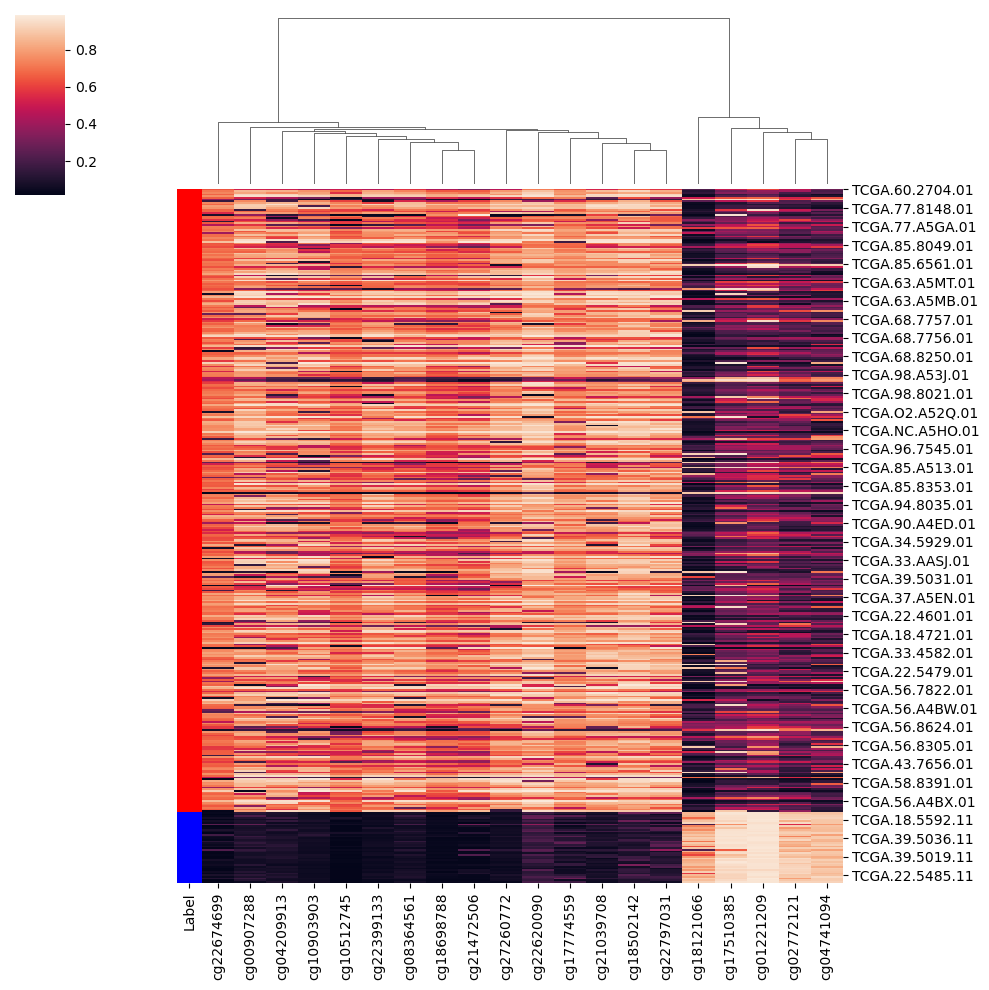

In [28]:
#visualize data heat map
twenty_meth = twenty_meth.sort_values('Label')
t_type = twenty_meth.pop("Label")
t_note = dict(zip(t_type.unique(), "rbg"))
row_colors = t_type.map(cancer_note)
g = sns.clustermap(twenty_meth, row_colors=row_colors, row_cluster=False)

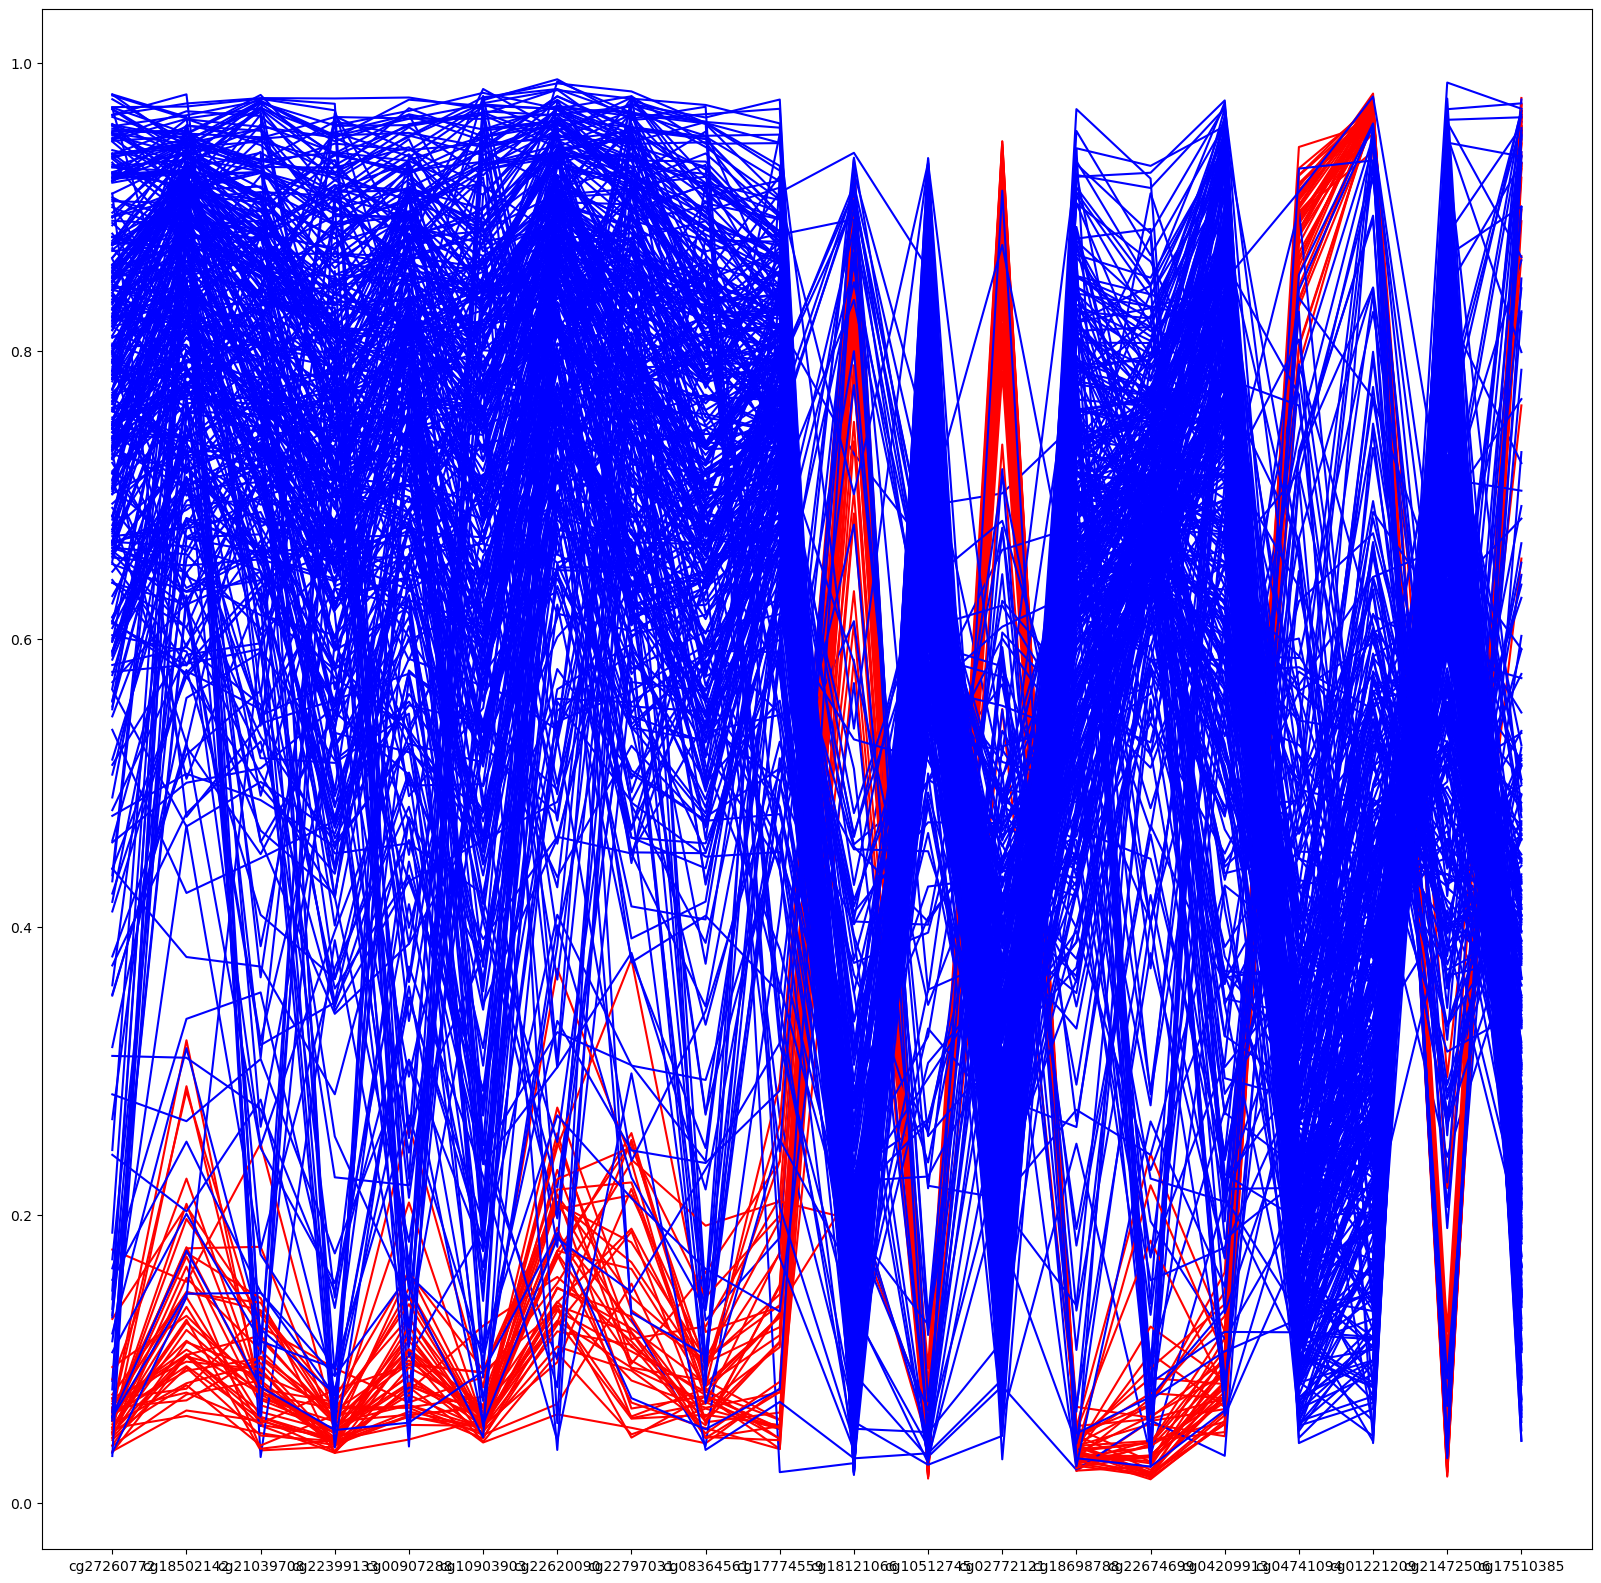

In [308]:
cancer_type = twenty_meth.pop('Label')
samples = twenty_meth.index.tolist()
cancer_note = dict(zip(cancer_type.unique(), "rbg"))
row_colors = cancer_type.map(cancer_note)
x_val = np.array(twenty_meth.columns.tolist())
for i in samples:
    mask = np.isfinite(twenty_meth.loc[i].values)
    plt.plot(x_val[mask], twenty_meth.loc[i].values[mask], label=i, color=row_colors[i])
plt.rcParams["figure.figsize"]=(20,20)
plt.show()

------------------------------

# Gene expression:

In [29]:
gene_exp = pd.read_csv("G5/G5/G5_lung_gene-expr.csv", header=0, index_col=0)

In [30]:
gene_exp['Label'].value_counts()

Primary Tumor          501
Solid Tissue Normal     51
Name: Label, dtype: int64

In [54]:
gene_exp.isna().any().any()

False

In [31]:
gene_exp.describe()

..100130426  ..100133144  ..100134869     ..10357      ..10431  \
count   552.000000   552.000000   552.000000  552.000000   552.000000   
mean      0.011802    20.616439    17.498012  164.070542   993.878029   
std       0.066156    18.097232    14.047672   70.343435   445.883467   
min       0.000000     0.000000     0.000000   50.018800   393.288100   
25%       0.000000     8.344425     8.125325  116.190100   699.765575   
50%       0.000000    16.022800    13.801600  147.440350   905.102600   
75%       0.000000    26.789000    21.293075  192.542450  1151.061850   
max       0.582500   125.101500    85.153600  473.632600  4533.721600   

       ..136542     ..155060     ..26823    ..280660  ..317712  ...  \
count     552.0   552.000000  552.000000  552.000000     552.0  ...   
mean        0.0   176.103211    0.473874    0.043724       0.0  ...   
std         0.0   151.247844    0.684235    0.565000       0.0  ...   
min         0.0     3.371400    0.000000    0.000000       0.0  ...   
25%         0.0    85.427200    0.000000    0.000000       0.0  ...   
50%         0.0   136.925850    0.334300    0.000000       0.0  ...   
75%         0.0   222.841050    0.697925    0.000000       0.0  ...   
max         0.0  1262.278600    8.545300   11.252200       0.0  ...   

        ZXDA.7789  ZXDB.158586   ZXDC.79364  ZYG11A.440590  ZYG11B.79699  \
count  552.000000   552.000000   552.000000     552.000000    552.000000   
mean    49.879045   351.138209  1402.793275      55.641859    703.213937   
std     21.234260   131.933341   539.896811      75.715629    223.407118   
min      4.214300    63.903300   314.870600       0.000000    188.550800   
25%     35.987475   266.589550  1042.830850       4.968200    544.705500   
50%     46.974400   335.558300  1307.798500      24.816450    670.939250   
75%     62.080950   408.072300  1649.670675      78.237900    815.291900   
max    164.110000  1220.662300  4782.939800     594.511400   2181.599400   

           ZYX.7791  ZZEF1.23140   ZZZ3.26009  psiTPTE22.387590  tAKR.389932  
count    552.000000   552.000000   552.000000        552.000000   552.000000  
mean    4807.934224  1058.714898   764.868437        158.188201     1.201131  
std     2414.995411   456.430989   266.834459        729.388008     6.046264  
min      526.175300   162.310000   271.528300          0.327500     0.000000  
25%     2996.692825   719.745325   580.445350          7.966175     0.000000  
50%     4277.543100   995.521050   708.685750         19.694350     0.000000  
75%     6206.859475  1330.272750   885.702000         99.524050     0.449425  
max    17037.809600  2665.348200  2236.807700      11065.273000   115.485500  

[8 rows x 20531 columns]

### log2(RPKM +1)

In [32]:
gene_exp = pd.read_csv("G5/G5/G5_lung_gene-expr.csv", header=0, index_col=0)
log_gene_expr = np.log2(gene_exp.loc[:, gene_exp.columns != 'Label'] + 1)

display(log_gene_expr)

..100130426  ..100133144  ..100134869   ..10357    ..10431  \
TCGA.18.3406.01          0.0     6.254787     4.723842  8.134305  10.561513   
TCGA.18.3407.01          0.0     3.946244     2.998791  7.638465   9.921248   
TCGA.18.3408.01          0.0     3.246226     2.129415  7.997704  10.526618   
TCGA.18.3409.01          0.0     1.843863     3.027473  7.369592   9.885110   
TCGA.18.3410.01          0.0     4.142846     4.362624  7.656806  10.176244   
...                      ...          ...          ...       ...        ...   
TCGA.O2.A52S.01          0.0     4.388899     5.588043  7.473444  10.215931   
TCGA.O2.A52V.01          0.0     4.958249     4.026419  7.567739  10.286593   
TCGA.O2.A52W.01          0.0     5.772395     5.103947  8.029747   9.626367   
TCGA.O2.A5IB.01          0.0     6.200979     5.432398  7.332371   8.851320   
TCGA.XC.AA0X.01          0.0     5.515703     4.622368  6.278892   9.656337   

                 ..136542  ..155060   ..26823  ..280660  ..317712  ...  \
TCGA.18.3406.01       0.0  4.621876  0.000000       0.0       0.0  ...   
TCGA.18.3407.01       0.0  8.241352  0.000000       0.0       0.0  ...   
TCGA.18.3408.01       0.0  5.650655  1.474877       0.0       0.0  ...   
TCGA.18.3409.01       0.0  6.559695  1.018349       0.0       0.0  ...   
TCGA.18.3410.01       0.0  6.929829  0.000000       0.0       0.0  ...   
...                   ...       ...       ...       ...       ...  ...   
TCGA.O2.A52S.01       0.0  7.831758  1.409038       0.0       0.0  ...   
TCGA.O2.A52V.01       0.0  7.214266  0.506094       0.0       0.0  ...   
TCGA.O2.A52W.01       0.0  9.740421  0.000000       0.0       0.0  ...   
TCGA.O2.A5IB.01       0.0  9.155381  1.221073       0.0       0.0  ...   
TCGA.XC.AA0X.01       0.0  8.288300  0.605968       0.0       0.0  ...   

                 ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11A.440590  \
TCGA.18.3406.01   6.259095     8.661554    8.745999       1.749406   
TCGA.18.3407.01   5.453399     8.252647   10.311997       2.746055   
TCGA.18.3408.01   5.700881     8.563311    9.885666       3.217991   
TCGA.18.3409.01   6.453957     9.271283   10.091774       1.343976   
TCGA.18.3410.01   5.377481     7.912152   10.018639       7.347730   
...                    ...          ...         ...            ...   
TCGA.O2.A52S.01   6.053055     8.989963   10.444806       6.991428   
TCGA.O2.A52V.01   5.753463     8.522955   10.374616       2.868529   
TCGA.O2.A52W.01   5.527852     8.400519   10.968441       6.680300   
TCGA.O2.A5IB.01   6.528581     9.192619   11.019276       7.242469   
TCGA.XC.AA0X.01   6.231171     8.757172   10.870217       6.418902   

                 ZYG11B.79699   ZYX.7791  ZZEF1.23140  ZZZ3.26009  \
TCGA.18.3406.01      9.947804  10.903852     8.057203    9.530568   
TCGA.18.3407.01      9.740497  12.043948     9.458743    9.909877   
TCGA.18.3408.01      9.331000   9.042139     9.206156    9.567055   
TCGA.18.3409.01     10.191312  12.099744     9.658532    9.979737   
TCGA.18.3410.01      9.477258  11.565471     9.525090    9.789982   
...                       ...        ...          ...         ...   
TCGA.O2.A52S.01      9.183134  11.389473    10.064118    9.614917   
TCGA.O2.A52V.01      9.726026  12.573490     9.377070    9.606689   
TCGA.O2.A52W.01      9.263618  11.323048     9.514226    9.575456   
TCGA.O2.A5IB.01     10.175198  10.211934     9.704480   10.434754   
TCGA.XC.AA0X.01      9.693191  12.372975    10.561895    9.346239   

                 psiTPTE22.387590  tAKR.389932  
TCGA.18.3406.01          3.015533     0.000000  
TCGA.18.3407.01          3.634326     0.561399  
TCGA.18.3408.01          2.793292     4.277196  
TCGA.18.3409.01          5.620736     0.000000  
TCGA.18.3410.01          2.703632     3.150186  
...                           ...          ...  
TCGA.O2.A52S.01          2.673737     1.164593  
TCGA.O2.A52V.01          1.632780     0.000000  
TCGA.O2.A52W.01          3.739729     0.000000  
TCGA.O2.A5IB.01    

## Scaling mean between genes

..100130426  ..100133144  ..100134869     ..10357     ..10431  \
count   552.000000   552.000000   552.000000  552.000000  552.000000   
mean      0.014441     3.932579     3.834839    7.252051    9.843872   
std       0.080365     1.325068     1.087057    0.568345    0.556883   
min       0.000000     0.000000     0.000000    5.672957    8.623106   
25%       0.000000     3.224106     3.189875    6.872707    9.452787   
50%       0.000000     4.089396     3.887678    7.213736    9.823530   
75%       0.000000     4.796440     4.478513    7.596506   10.170001   
max       0.662205     6.978442     6.428839    8.890667   12.146798   

       ..136542    ..155060     ..26823    ..280660  ..317712  ...  \
count     552.0  552.000000  552.000000  552.000000     552.0  ...   
mean        0.0    7.074850    0.456485    0.022811       0.0  ...   
std         0.0    1.096945    0.509417    0.224706       0.0  ...   
min         0.0    2.128095    0.000000    0.000000       0.0  ...   
25%         0.0    6.433411    0.000000    0.000000       0.0  ...   
50%         0.0    7.107741    0.416081    0.000000       0.0  ...   
75%         0.0    7.806325    0.763772    0.000000       0.0  ...   
max         0.0   10.302957    3.254791    3.614969       0.0  ...   

        ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11A.440590  ZYG11B.79699  \
count  552.000000   552.000000  552.000000     552.000000    552.000000   
mean     5.542348     8.369010   10.358001       4.406915      9.392578   
std      0.629512     0.514937    0.530716       2.276350      0.439793   
min      2.382474     6.020220    8.303190       0.000000      7.566441   
25%      5.208961     8.063877   10.027671       2.577287      9.091978   
50%      5.584193     8.394713   10.354027       4.690219      9.392187   
75%      5.979132     8.676212   10.688837       6.308104      9.672935   
max      7.367284    10.254630   12.223984       9.217985     11.091832   

         ZYX.7791  ZZEF1.23140  ZZZ3.26009  psiTPTE22.387590  tAKR.389932  
count  552.000000   552.000000  552.000000        552.000000   552.000000  
mean    12.054532     9.902003    9.503920          4.924024     0.467782  
std      0.730707     0.688531    0.464216          2.322635     0.947423  
min      9.042139     7.351469    8.090262          0.408712     0.000000  
25%     11.549637     9.493338    9.183500          3.164490     0.000000  
50%     12.062898     9.960755    9.471031          4.371165     0.000000  
75%     12.599879    10.378589    9.792304          6.651386     0.535472  
max     14.056537    11.380649   11.127870         13.433882     6.864007  

[8 rows x 20531 columns]

C:\Users\linhn\AppData\Local\Temp\ipykernel_38384\240378982.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_expr_sum.T['mean'], shade=True)


<AxesSubplot:xlabel='mean', ylabel='Density'>

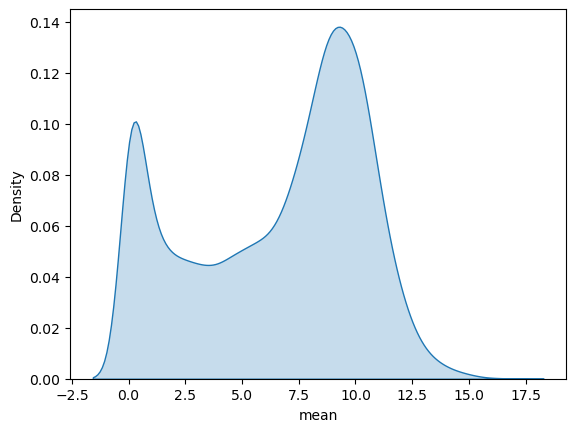

In [33]:
log_expr_sum = log_gene_expr.describe()
display(log_expr_sum)

sns.kdeplot(log_expr_sum.T['mean'], shade=True)

### scale around 2 values (2 peaks) => need to rescale/ normalization

This is true because this data is RKPM which means the counts are scaled within each samples not across entire data set
Try normalize across samples with minmax

### Filter gene with log=0 in both cancer and normal as they don't express in any type

In [34]:
gene_exp = pd.read_csv("G5/G5/G5_lung_gene-expr.csv", header=0, index_col=0)
label = pd.DataFrame(gene_exp['Label'])


#drop no expressing gene in both normal and cancer
filter_log_gene = log_gene_expr.loc[:, (log_gene_expr != 0.0).all(axis=0)]
display(filter_log_gene)

..10357    ..10431  ..155060    ..57714   ..653553  \
TCGA.18.3406.01  8.134305  10.561513  4.621876   7.234638   9.618458   
TCGA.18.3407.01  7.638465   9.921248  8.241352   8.599074   9.381613   
TCGA.18.3408.01  7.997704  10.526618  5.650655   8.170489   3.217991   
TCGA.18.3409.01  7.369592   9.885110  6.559695   8.213821   7.767675   
TCGA.18.3410.01  7.656806  10.176244  6.929829   8.424927   7.242837   
...                   ...        ...       ...        ...        ...   
TCGA.O2.A52S.01  7.473444  10.215931  7.831758  10.105358   7.436174   
TCGA.O2.A52V.01  7.567739  10.286593  7.214266   8.998753  10.292405   
TCGA.O2.A52W.01  8.029747   9.626367  9.740421   8.605482  11.201579   
TCGA.O2.A5IB.01  7.332371   8.851320  9.155381   9.865901   7.660196   
TCGA.XC.AA0X.01  6.278892   9.656337  8.288300   9.270222   9.339280   

                    ..8225    A1BG.1  A2LD1.87769      A2M.2  A4GALT.53947  \
TCGA.18.3406.01  10.663789  9.536622     7.419844  13.147790      7.514831   
TCGA.18.3407.01   8.469532  5.576301     6.899735  13.465461     10.366043   
TCGA.18.3408.01   5.469372  1.128557     7.222376  13.841550      7.580596   
TCGA.18.3409.01   8.708863  7.354436     6.124731  14.616956      8.061527   
TCGA.18.3410.01   9.269217  8.102664     7.436453  12.068093     10.022469   
...                    ...       ...          ...        ...           ...   
TCGA.O2.A52S.01   8.825959  7.067880     6.261068  11.826128      8.584452   
TCGA.O2.A52V.01   9.666099  7.226947     6.457859  12.400616     10.216479   
TCGA.O2.A52W.01   9.946163  5.747503     6.366308  12.371806     12.414515   
TCGA.O2.A5IB.01   9.945576  3.993502     5.476719  14.012936      4.801692   
TCGA.XC.AA0X.01   9.230657  5.741370     5.646839  13.844056     11.322985   

                 ...  ZWILCH.55055  ZWINT.11130  ZXDA.7789  ZXDB.158586  \
TCGA.18.3406.01  ...      8.896034     8.970932   6.259095     8.661554   
TCGA.18.3407.01  ...      8.653948     8.701545   5.453399     8.252647   
TCGA.18.3408.01  ...      8.875393     9.629974   5.700881     8.563311   
TCGA.18.3409.01  ...      8.557871     9.026559   6.453957     9.271283   
TCGA.18.3410.01  ...     10.574085    10.749447   5.377481     7.912152   
...              ...           ...          ...        ...          ...   
TCGA.O2.A52S.01  ...     10.070663    10.994873   6.053055     8.989963   
TCGA.O2.A52V.01  ...      9.281594    10.389155   5.753463     8.522955   
TCGA.O2.A52W.01  ...      9.227864    10.038985   5.527852     8.400519   
TCGA.O2.A5IB.01  ...      8.747930    10.596058   6.528581     9.192619   
TCGA.XC.AA0X.01  ...      8.544850     9.178325   6.231171     8.757172   

                 ZXDC.79364  ZYG11B.79699   ZYX.7791  ZZEF1.23140  ZZZ3.26009  \
TCGA.18.3406.01    8.745999      9.947804  10.903852     8.057203    9.530568   
TCGA.18.3407.01   10.311997      9.740497  12.043948     9.458743    9.909877   
TCGA.18.3408.01    9.885666      9.331000   9.042139     9.206156    9.567055   
TCGA.18.3409.01   10.091774     10.191312  12.099744     9.658532    9.979737   
TCGA.18.3410.01   10.018639      9.477258  11.565471     9.525090    9.789982   
...                     ...           ...        ...          ...         ...   
TCGA.O2.A52S.01   10.444806      9.183134  11.389473    10.064118    9.614917   
TCGA.O2.A52V.01   10.374616      9.726026  12.573490     9.377070    9.606689   
TCGA.O2.A52W.01   10.968441      9.263618  11.323048     9.514226    9.575456   
TCGA.O2.A5IB.01   11.019276     10.175198  10.211934     9.704480   10.434754   
TCGA.XC.AA0X.01   10.870217      9.693191  12.372975    10.561895    9.346239   

                 psiTPTE22.387590  
TCGA.18.3406.01          3.015533  
TCGA.18.3407.01          3.634326  
TCGA.18.3408.01          2.793292  
TCGA.18.3409.01          5.620736  
TCGA.18.3410.01          2.703632  
...                           ...  
TCGA.O2.A52S.01          2.673737  
TCGA.O2.A52V.01          1.632780  
TCGA.O2.A52W.01   

RPKM is not idealy for the gene expression comparison between samples or group as values not normalize across all samples
Normalize across sample for each gene using minmaxscaler~ gene expression across the samples -> can be helper option for choosing the more differenial expression gene (not the best) as it bring the log expression of a gene in all sample back to 1 scale.

In [35]:
#normalize by minamaxscaler()
scaler = MinMaxScaler()
scaler.fit(filter_log_gene)
scaled = scaler.fit_transform(filter_log_gene)
scaled_log_gene=pd.DataFrame(scaled, columns=filter_log_gene.columns, index=filter_log_gene.index)

#add label back
scaled_log_gene.insert(0, 'Label', label)
scaled_log_gene
scaled_log_gene.describe()

..10357     ..10431    ..155060     ..57714    ..653553      ..8225  \
count  552.000000  552.000000  552.000000  552.000000  552.000000  552.000000   
mean     0.490751    0.346445    0.605118    0.524459    0.642781    0.603588   
std      0.176630    0.158040    0.134185    0.125689    0.130521    0.106478   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.372858    0.235458    0.526653    0.445352    0.550775    0.537117   
50%      0.478843    0.340672    0.609141    0.526033    0.655354    0.607576   
75%      0.597801    0.438998    0.694596    0.609122    0.729746    0.666199   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           A1BG.1  A2LD1.87769       A2M.2  A4GALT.53947  ...  ZWILCH.55055  \
count  552.000000   552.000000  552.000000    552.000000  ...    552.000000   
mean     0.573893     0.572182    0.505825      0.622265  ...      0.587433   
std      0.129954     0.143705    0.180055      0.168010  ...      0.208739   
min      0.000000     0.000000    0.000000      0.000000  ...      0.000000   
25%      0.491979     0.484765    0.390372      0.511013  ...      0.492947   
50%      0.573689     0.568125    0.481966      0.627128  ...      0.623092   
75%      0.657687     0.668537    0.587554      0.744597  ...      0.732356   
max      1.000000     1.000000    1.000000      1.000000  ...      1.000000   

       ZWINT.11130   ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11B.79699  \
count   552.000000  552.000000   552.000000  552.000000    552.000000   
mean      0.633751    0.633901     0.554691    0.524080      0.517996   
std       0.170601    0.126286     0.121608    0.135359      0.124750   
min       0.000000    0.000000     0.000000    0.000000      0.000000   
25%       0.585503    0.567020     0.482631    0.439830      0.432729   
50%       0.673342    0.642295     0.560761    0.523067      0.517885   
75%       0.739105    0.721524     0.627240    0.608460      0.597521   
max       1.000000    1.000000     1.000000    1.000000      1.000000   

         ZYX.7791  ZZEF1.23140  ZZZ3.26009  psiTPTE22.387590  
count  552.000000   552.000000  552.000000        552.000000  
mean     0.600749     0.633016    0.465385          0.346660  
std      0.145722     0.170886    0.152823          0.178319  
min      0.000000     0.000000    0.000000          0.000000  
25%      0.500060     0.531589    0.359901          0.211573  
50%      0.602417     0.647597    0.454558          0.304215  
75%      0.709505     0.751299    0.560323          0.479278  
max      1.000000     1.000000    1.000000          1.000000  

[8 rows x 13434 columns]

C:\Users\linhn\anaconda3\envs\binf7000\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


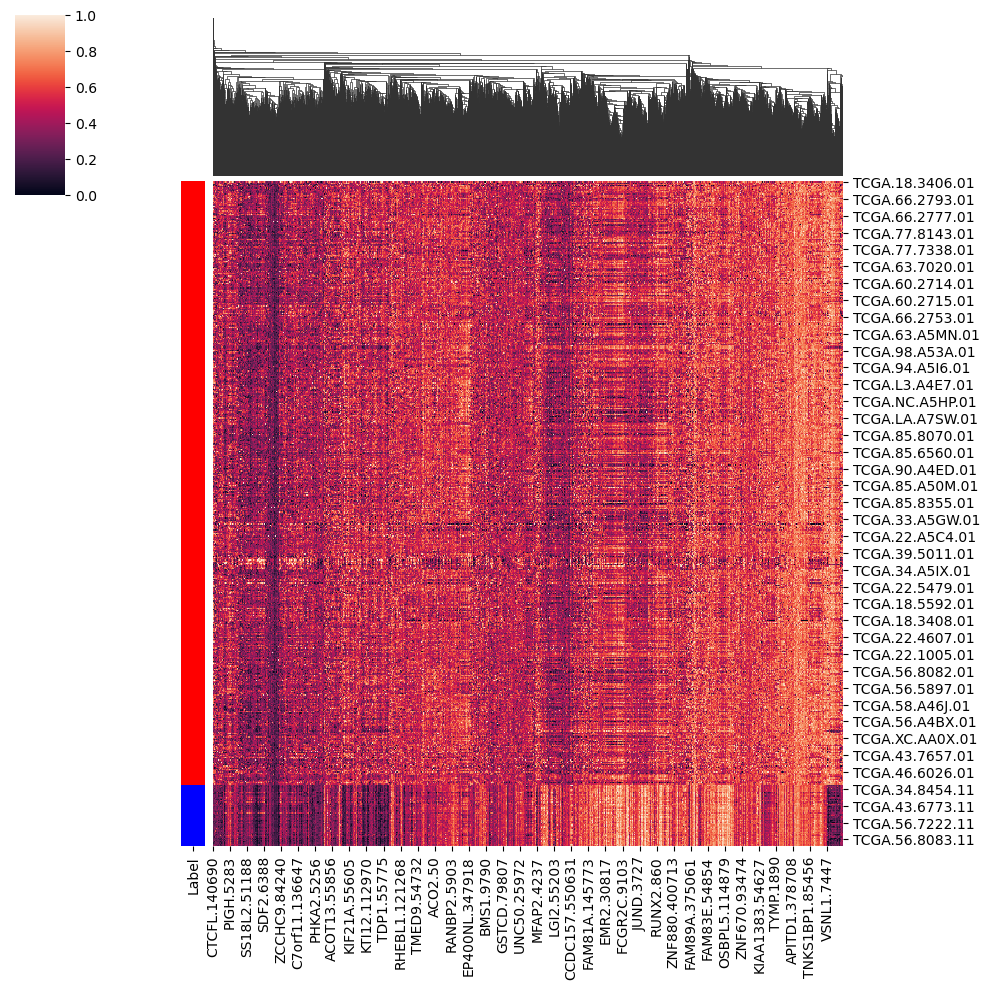

In [32]:
#visualize scaled log gene

sort_log_gene = scaled_log_gene.copy()
sort_log_gene = pd.DataFrame(sort_log_gene.sort_values(by='Label'))

tissue_type = sort_log_gene.pop('Label')
samples = sort_log_gene.index.tolist()
tissue_note = dict(zip(tissue_type.unique(), "rbg"))
row_colors = tissue_type.map(tissue_note)
g = sns.clustermap(sort_log_gene, row_colors=row_colors, row_cluster=False)

In [36]:
#calculate mean of log2
scaled_log_gene.groupby('Label').mean()

..10357   ..10431  ..155060   ..57714  ..653553  \
Label                                                                   
Primary Tumor        0.508166  0.365016  0.610942  0.519016  0.659038   
Solid Tissue Normal  0.319675  0.164016  0.547907  0.577929  0.483073   

                       ..8225    A1BG.1  A2LD1.87769     A2M.2  A4GALT.53947  \
Label                                                                          
Primary Tumor        0.604323  0.574779     0.577353  0.467149      0.634174   
Solid Tissue Normal  0.596367  0.565186     0.521382  0.885761      0.505269   

                     ...  ZWILCH.55055  ZWINT.11130  ZXDA.7789  ZXDB.158586  \
Label                ...                                                      
Primary Tumor        ...      0.635159     0.676516   0.629040     0.550576   
Solid Tissue Normal  ...      0.118592     0.213649   0.681645     0.595112   

                     ZXDC.79364  ZYG11B.79699  ZYX.7791  ZZEF1.23140  \
Label                                                                  
Primary Tumor          0.528890      0.502912  0.583545     0.612663   
Solid Tissue Normal    0.476834      0.666170  0.769751     0.832948   

                     ZZZ3.26009  psiTPTE22.387590  
Label                                              
Primary Tumor          0.479675          0.332077  
Solid Tissue Normal    0.325011          0.489920  

[2 rows x 13434 columns]

## Log FC 

In [37]:
FC_scaled_gene_exp = pd.DataFrame(scaled_log_gene.groupby('Label').mean())
FC_scaled_gene_exp = FC_scaled_gene_exp.T
FC_scaled_gene_exp['Log FC'] = abs(FC_scaled_gene_exp['Primary Tumor'] - FC_scaled_gene_exp['Solid Tissue Normal'])

In [38]:
sorted_FC = FC_scaled_gene_exp.sort_values('Log FC')
sorted_FC

Label         Primary Tumor  Solid Tissue Normal    Log FC
RHPN2.85415        0.464910             0.464945  0.000035
ALG13.79868        0.320270             0.320232  0.000039
GNAL.2774          0.592583             0.592630  0.000047
RPL22.6146         0.345132             0.345193  0.000061
IFT46.56912        0.538159             0.538094  0.000065
...                     ...                  ...       ...
AGER.177           0.369716             0.911764  0.542049
POLQ.10721         0.736710             0.193068  0.543642
CENPA.1058         0.776824             0.231862  0.544961
CDCA5.113130       0.754955             0.208393  0.546562
SLC2A1.6513        0.712872             0.130651  0.582221

[13434 rows x 3 columns]

# Top 20 expression different based on Log FC

In [39]:
FC_abs_different_expr = np.abs(FC_scaled_gene_exp['Log FC'])
display(FC_abs_different_expr)

..10357             0.188491
..10431             0.200999
..155060            0.063035
..57714             0.058913
..653553            0.175966
                      ...   
ZYG11B.79699        0.163258
ZYX.7791            0.186206
ZZEF1.23140         0.220285
ZZZ3.26009          0.154664
psiTPTE22.387590    0.157843
Name: Log FC, Length: 13434, dtype: float64

In [45]:
top_20_dif_expr_gene = list(FC_abs_different_expr.nlargest(n=20).index) 

In [46]:
#subset choosen gene (raw data) -> write file
subset_20_dif_gen = gene_exp[top_20_dif_expr_gene]
subset_20_dif_gen.insert(0, "Label", label)

In [38]:
subset_20_dif_gen.to_csv("Top_20_differential_expression_gene.csv")

In [42]:
display(subset_20_dif_gen)

Label  SLC2A1.6513  CDCA5.113130  CENPA.1058  \
TCGA.18.3406.01  Primary Tumor   24354.3307      259.8425    157.4803   
TCGA.18.3407.01  Primary Tumor   27911.5128      598.4776    148.9058   
TCGA.18.3408.01  Primary Tumor   11542.0436      417.6183    207.0295   
TCGA.18.3409.01  Primary Tumor   19213.8462      305.6410     92.8205   
TCGA.18.3410.01  Primary Tumor    9579.7133     1426.2630    397.0376   
...                        ...          ...           ...         ...   
TCGA.O2.A52S.01  Primary Tumor    7556.7053     2139.0728    741.3079   
TCGA.O2.A52V.01  Primary Tumor   25688.4126      643.3449    253.3880   
TCGA.O2.A52W.01  Primary Tumor   22800.1075      754.9704    537.8829   
TCGA.O2.A5IB.01  Primary Tumor    8998.6688     1426.2513    323.2162   
TCGA.XC.AA0X.01  Primary Tumor   17754.9263      463.5260    109.0957   

                 POLQ.10721   AGER.177  TROAP.10024  KIF14.9928  EXO1.9156  \
TCGA.18.3406.01    129.9213   245.6693     311.8110    129.1339   206.2992   
TCGA.18.3407.01    208.8487   255.4710     155.5661    280.2093   347.2883   
TCGA.18.3408.01    198.1314    39.7449     173.2167    208.8091   381.4326   
TCGA.18.3409.01     52.3077   333.3333      93.8462     51.2821   108.7179   
TCGA.18.3410.01    378.1310    63.0218    1160.7835    348.9834   548.6839   
...                     ...        ...          ...         ...        ...   
TCGA.O2.A52S.01    676.3245    20.6954    1166.3907   1138.2450   543.4603   
TCGA.O2.A52V.01    569.8078    65.5531     480.3026    506.3557   345.8346   
TCGA.O2.A52W.01    758.7319   278.3450     925.8463    419.1295   475.0134   
TCGA.O2.A5IB.01    559.6379   138.1789     602.7689    609.9574   467.7849   
TCGA.XC.AA0X.01    364.3482  2258.1235     364.3482    232.8070   197.3118   

                 SERPINB5.5268  ...  GINS1.9837  CKAP2L.150468  GPR87.53836  \
TCGA.18.3406.01     16768.5039  ...    734.6457       147.2441    6319.6850   
TCGA.18.3407.01      9081.8268  ...    450.0476       284.0152    1154.6147   
TCGA.18.3408.01     11991.6951  ...    553.4629       329.8235    3976.8649   
TCGA.18.3409.01      2129.2308  ...    692.8205       120.5128    3338.4615   
TCGA.18.3410.01      1367.9678  ...   1280.1311       404.9153    1375.0577   
...                        ...  ...         ...            ...          ...   
TCGA.O2.A52S.01       309.1887  ...   2121.2748       637.4172     218.1291   
TCGA.O2.A52V.01      3860.9098  ...    744.6160       474.4196    1361.0673   
TCGA.O2.A52W.01      3478.7749  ...   1030.6287       537.3455    1058.5707   
TCGA.O2.A5IB.01      1027.1565  ...   1306.7093       780.8839      23.9617   
TCGA.XC.AA0X.01      8971.4211  ...    279.2640       125.7993     899.9087   

                 KIF23.9493  PLK1.5347  B4GALNT4.338707  CCNB1.891  \
TCGA.18.3406.01    225.1969   332.2835         174.8031  1936.2205   
TCGA.18.3407.01    370.5994   654.6147         274.0247   919.1246   
TCGA.18.3408.01    444.9058   443.7194          15.4234   941.4207   
TCGA.18.3409.01    351.7949   310.7692         592.8205   711.7949   
TCGA.18.3410.01   1371.1189   910.2717          82.3223  1966.2813   
...                     ...        ...              ...        ...   
TCGA.O2.A52S.01   1939.5695  2867.5497        2691.6391  1948.2616   
TCGA.O2.A52V.01    909.7594   802.6053         258.0103  1473.6842   
TCGA.O2.A52W.01    891.9936   973.1327         704.9973  1658.2483   
TCGA.O2.A5IB.01    909.7444  1641.1076        1336.7945  1485.6230   
TCGA.XC.AA0X.01    487.0155   547.5662         470.3119   678.0634   

                 RAD54L.8438  C19orf59.199675  CLEC3B.7123  
TCGA.18.3406.01      87.4016         180.3150     197.6378  
TCGA.18.3407.01     196.4795          56.6127      68.9819  
TCGA.18.3408.01      83.6423          48.0498      31.4400  
TCGA.18.3409.01     140.5128         140.5128     140.5128  
TCGA.18.3410.01     711.3590          28.7537      64.5974  
...                      ...              ...          

C:\Users\linhn\anaconda3\envs\binf7000\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


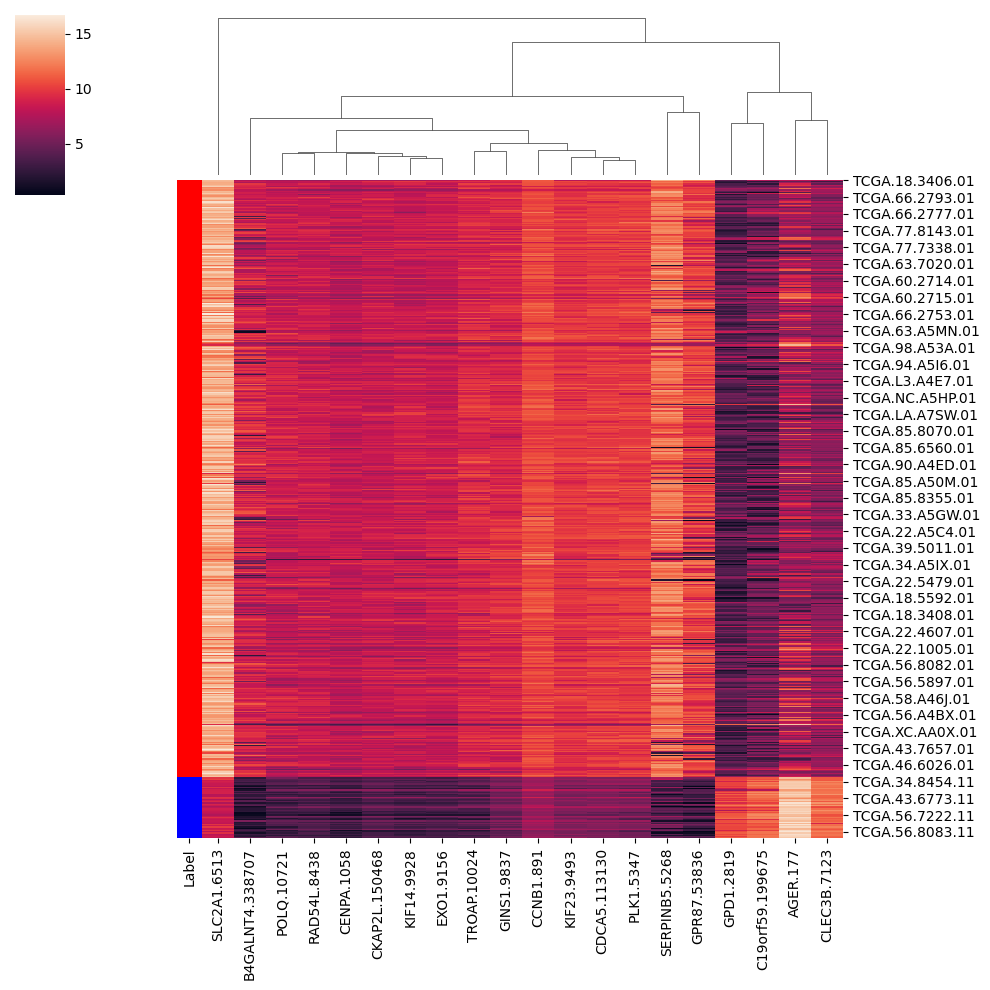

In [65]:
#visualize data
plot_ex = log_gene_expr[top_20_dif_expr_gene]
plot_ex.insert(0, "Label", label)

plot_ex = plot_ex.sort_values('Label')
e_type = plot_ex.pop("Label")
e_note = dict(zip(e_type.unique(), "rbg"))
row_colors = e_type.map(e_note)
g = sns.clustermap(plot_ex, row_colors=row_colors, row_cluster=False)

In [61]:
row_colors.isna().any()

False